# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [2]:
# making an API call
import requests

api_endpoint = "https://pokeapi.co/api/v2/pokemon/"

# requests.get(api_endpoint + "psyduck").json()

pokemon = input("what pokemon are you looking for? ")

response = requests.get(f"{api_endpoint}{pokemon}")
# print(response)

response.status_code

if response.status_code == 200:
    data = response.json()
    print("success")
else:
    print(f"error, status code {response.status_code}")
                       

what pokemon are you looking for? psyduck
success


### Display a Pokemon's name, weight, abilities, and types

In [3]:
# get the name
data["forms"][0]["name"]

'psyduck'

In [4]:
# get types
data["types"]

[{'slot': 1,
  'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]

In [5]:
# get weight
data["weight"]

196

In [6]:
# get abilities
abilities = data["abilities"]

In [7]:
[ability_dict["ability"]["name"] for ability_dict in abilities]

['damp', 'cloud-nine', 'swift-swim']

In [8]:
# Create a structure for a single pokemon

pokemon_dict = {
    "name" : data["name"]
    "type": data["types"]
    "weight": data["weight"]
    "abilities": [ability_dict["ability"]["name"] for ability_dict in abilities]
    
}


SyntaxError: invalid syntax (2352596831.py, line 5)

In [9]:
pokemon

'psyduck'

#### Create a function to Pull in your own Pokemon's data 

In [10]:
# access the api with pokemon input
# check status
# access each dict keys: abilities, type, name, weight
# store those values in dict

def poke_api_call(pokemon):
    response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon}")
    if response.status_code == 200:
        print("success")
        data = response.json()
        pokemon_dict = {
            "abilities": data["abilities"],
            "name" : data["name"],
            "type": data["types"],
            "weight": data["weight"]
        }
    else:
        print(f"Error bad request {response.status_code}")
    return pokemon_dict

print(poke_api_call("pikachu"))

success
{'abilities': [{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'lightning-rod', 'url': 'https://pokeapi.co/api/v2/ability/31/'}, 'is_hidden': True, 'slot': 3}], 'name': 'pikachu', 'type': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}], 'weight': 60}


Choose your pokemon

In [11]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,1010) for i in range(6)]

print(random_team)
your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


[686, 148, 80, 33, 276, 791]


In [12]:
your_team_dict = {pokemon:poke_api_call(pokemon) for pokemon in your_team}

print(your_team_dict)

success
success
success
success
success
success
{'electabuzz': {'abilities': [{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'vital-spirit', 'url': 'https://pokeapi.co/api/v2/ability/72/'}, 'is_hidden': True, 'slot': 3}], 'name': 'electabuzz', 'type': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}], 'weight': 300}, 'haunter': {'abilities': [{'ability': {'name': 'levitate', 'url': 'https://pokeapi.co/api/v2/ability/26/'}, 'is_hidden': False, 'slot': 1}], 'name': 'haunter', 'type': [{'slot': 1, 'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}], 'weight': 1}, 'tyranitar': {'abilities': [{'ability': {'name': 'sand-stream', 'url': 'https://pokeapi.co/api/v2/ability/45/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'unnerve', 'url': 'https://pokeapi.co/

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [13]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for i in random_team:
    poke_dict = poke_api_call(i)
    my_six_pokemon[poke_dict["name"]] = poke_dict
    
for k in my_six_pokemon:
    print(k, " ", my_six_pokemon[k])



success
success
success
success
success
success
inkay   {'abilities': [{'ability': {'name': 'contrary', 'url': 'https://pokeapi.co/api/v2/ability/126/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'suction-cups', 'url': 'https://pokeapi.co/api/v2/ability/21/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'infiltrator', 'url': 'https://pokeapi.co/api/v2/ability/151/'}, 'is_hidden': True, 'slot': 3}], 'name': 'inkay', 'type': [{'slot': 1, 'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}, {'slot': 2, 'type': {'name': 'psychic', 'url': 'https://pokeapi.co/api/v2/type/14/'}}], 'weight': 35}
dragonair   {'abilities': [{'ability': {'name': 'shed-skin', 'url': 'https://pokeapi.co/api/v2/ability/61/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'marvel-scale', 'url': 'https://pokeapi.co/api/v2/ability/63/'}, 'is_hidden': True, 'slot': 3}], 'name': 'dragonair', 'type': [{'slot': 1, 'type': {'name': 'dragon', 'url': 'https://pokeapi.co/api/v2/typ

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [14]:
pokemon = {
    "abilities": data["abilities"],
    "name" : data["name"],
    "type": data["types"],
    "weight": data["weight"]
}

In [15]:
class Pokemon():
    
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api()

    def call_poke_api(self):
        response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if response.status_code == 200:
            print("success")
            data = response.json()
            self.name = data["name"]
            data = response.json()
            self.abilities = [ability_object["ability"]["name"]for ability_object in data["abilities"]]
            self.types = [type_object["type"]["name"] for type_object in data["types"]]
            self.weight = data["weight"]
            self.image = data["sprites"]["versions"]["generation-v"]["black-white"]["animated"]["front_default"]
            if not self.image:
                self.image = data["sprites"] ["other"]["dream_world"]["fron_default"]
        else:
            print(f"Error status code {response.status_code}")
            
            

success
success


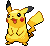

In [18]:
new_poke = Pokemon("pikachu", "zappy rodent")
new_poke.call_poke_api()
new_poke.image
from IPython.display import Image
display(Image(new_poke.image))

In [19]:
class Pokemon():
    
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api()

    def call_poke_api(self):
        response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if response.status_code == 200:
            print("success")
            data = response.json()
            self.name = data["name"]
            data = response.json()
            self.abilities = [ability_object["ability"]["name"]for ability_object in data["abilities"]]
            self.types = [type_object["type"]["name"] for type_object in data["types"]]
            self.weight = data["weight"]
            self.image = data["sprites"]["versions"]["generation-v"]["black-white"]["animated"]["front_default"]
            if not self.image:
                self.image = data["sprites"] ["other"]["dream_world"]["fron_default"]
        else:
            print(f"Error status code {response.status_code}")
            
            

success
success


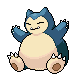

In [20]:
new_poke = Pokemon("snorlax", "zappy rodent")
new_poke.call_poke_api()
new_poke.image
from IPython.display import Image
display(Image(new_poke.image))

In [240]:
# another_poke = Pokemon("1", "vine turtle")
# print(another_poke.name)
# another_poke.abilities
# another_poke.image


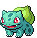

In [241]:
from IPython.display import Image

display(Image(another_poke.image))

### Let's Catch some Pokemon

In [125]:
mds_pokemon = ['snorlax', 'psyduck', 'zapdos', 'hitmonlee']

In [128]:
for pokemon in mds_pokemon:
    pokedex[pokemon] = Pokemon(pokemon, 'generic name')
print(pokedex)    

success
success
success
success
{'snorlax': <__main__.Pokemon object at 0x000002CAEB3089A0>, 'psyduck': <__main__.Pokemon object at 0x000002CAEAFC5AF0>, 'zapdos': <__main__.Pokemon object at 0x000002CAEB044CD0>, 'hitmonlee': <__main__.Pokemon object at 0x000002CAE9973CD0>}


In [129]:
pokedex = {pokemon : Pokemon(pokemon, 'nickname') for pokemon in mds_pokemon}



success
success
success
success


In [134]:
class Pokedex:
    def __init__(self, username):
        self.username = username
        self.pokemon = {}
    
        
    def add_pokemon(self, pokemon):
        self.pokemon[pokemon] = Pokemon(pokemon, 'monster')
        
new_pokedex = Pokedex("md")

new_pokedex.add_pokemon("squirtle")
new_pokedex.add_pokemon("mewtwo")

new_pokedex.username
new_pokedex.pokemon

success
success


{'squirtle': <__main__.Pokemon at 0x2caeb3080d0>,
 'mewtwo': <__main__.Pokemon at 0x2caeb308100>}

In [145]:
def print_user_pokemon(pokedex):
    print(f'{pokedex.username}\'s pokemon:')
    poke_dict = pokedex.pokemon
    for poke in pokedex.pokemon:
          print(poke_dict[poke].name)
          
print(print_user_pokemon(new_pokedex))

md's pokemon:
squirtle
mewtwo
None


## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [47]:
class Pokemon():
    
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.image = None
        self.call_poke_api()

    def call_poke_api(self):
        response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if response.status_code == 200:
            print("success")
            data = response.json()
            self.name = data["name"]
            data = response.json()
            self.image = data["sprites"]["versions"]["generation-v"]["black-white"]["animated"]["front_default"]
        else:
            print(f"Error status code {response.status_code}")

success
success


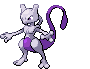

In [48]:
poke = Pokemon("mewtwo", "Kitty")
poke.call_poke_api()
poke.image
from IPython.display import Image
display(Image(poke.image))

success
success


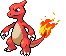

In [45]:
poke = Pokemon("charmeleon", "Dino")
poke.call_poke_api()
poke.image
from IPython.display import Image
display(Image(poke.image))

success
success


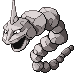

In [44]:
poke = Pokemon("onix", "Snakie")
poke.call_poke_api()
poke.image
from IPython.display import Image
display(Image(poke.image))

success
success


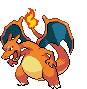

In [42]:
poke = Pokemon("charizard", "Smaug")
poke.call_poke_api()
poke.image
from IPython.display import Image
display(Image(poke.image))

# Another Way:

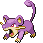

In [49]:
from IPython.display import Image
display(Image("https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/19.gif", width = 80))

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [1]:
# pokemon -> species -> url -> evolution chain

from requests import get

class Pokemon():
    
    def __init__(self, name):
        self.name = name
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api()
        
    def call_poke_api(self):
        response = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if response.status_code == 200:
            print('Success')
            data = response.json()
            self.name = data['name']
            self.abilites = [ability_object['ability']['name'] for ability_object in data['abilities']],
            self.types = [type_object['type']['name'] for type_object in data['types']]
            self.weight = data['weight']
#             self.image = data['sprites']['front_defualt']
            self.image = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
            if not self.image:
                self.image = data['sprites']['front_default']
            self.species_url = data['species']['url']
        else:
            print(f'Error status code {response.status_code}')
            
    def get_evolution_chain(self):
        response = get(self.species_url)
        if response.status_code == 200:
            data = response.json()
        evolution_chain_url = data['evolution_chain']['url']
        evolution_chain = get(evolution_chain_url)
        if evolution_chain.status_code == 200:
            return evolution_chain.json()['chain']
            
    def evolve_pokemon(self, evolution_chain):
        if not evolution_chain['evolves_to']:
            print(f'This is the final from')
            return
        current_pokemon_in_chain = evolution_chain['species']['name']
        next_pokemon_in_chain = evolution_chain['evolves_to'][0]['species']['name']
        if current_pokemon_in_chain == self.name:
            self.name = next_pokemon_in_chain
            self.call_poke_api()
            return
        else:
            return self.evolve_pokemon(evolution_chain['evolves_to'][0])

Now let's evolve a few

In [4]:
pokemon = Pokemon("1")
pokemon.get_evolution_chain()


Success


{'evolution_details': [],
 'evolves_to': [{'evolution_details': [{'gender': None,
     'held_item': None,
     'item': None,
     'known_move': None,
     'known_move_type': None,
     'location': None,
     'min_affection': None,
     'min_beauty': None,
     'min_happiness': None,
     'min_level': 16,
     'needs_overworld_rain': False,
     'party_species': None,
     'party_type': None,
     'relative_physical_stats': None,
     'time_of_day': '',
     'trade_species': None,
     'trigger': {'name': 'level-up',
      'url': 'https://pokeapi.co/api/v2/evolution-trigger/1/'},
     'turn_upside_down': False}],
   'evolves_to': [{'evolution_details': [{'gender': None,
       'held_item': None,
       'item': None,
       'known_move': None,
       'known_move_type': None,
       'location': None,
       'min_affection': None,
       'min_beauty': None,
       'min_happiness': None,
       'min_level': 32,
       'needs_overworld_rain': False,
       'party_species': None,
       'part

In [5]:
print(pokemon.name)
pokemon.evolve_(pokemon.get_evolution_chain())

from IPython.display import Image

bulbasaur


#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [23]:
class MoveTutor:
    def __init__(self, moves):
        self.moves = moves
    
    def teach_move(self, move):
        self.moves.append(move)
    
    def forget_move(self, move):
        self.moves.remove(move)


class Pokemon(MoveTutor):
    def __init__(self, name, level, moves):
        super().__init__(moves)
        self.name = name
        self.level = level
    
    def display_moves(self):
        print(f"{self.name}'s moves:")
        for move in self.moves:
            print(move)

In [24]:
pikachu_moves = ['Thunderbolt', 'Quick Attack', 'Iron Tail', "Thunder Wave"]
pikachu = Pokemon('Pikachu', 30, pikachu_moves)

In [25]:
pikachu.teach_move("Floaty Fall")
pikachu.display_moves()

Pikachu's moves:
Thunderbolt
Quick Attack
Iron Tail
Thunder Wave
Floaty Fall


In [26]:
pikachu.forget_move('Iron Tail')
pikachu.display_moves()

Pikachu's moves:
Thunderbolt
Quick Attack
Thunder Wave
Floaty Fall
